Importy

In [1]:
from Number import Number
from Strassen import SMU
from Binet import BMU
from AI import AMU
import numpy as np
from  timeit import default_timer as timer
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Generacja tablic do testowania

In [14]:
def gen_mat_of_size_2_power_k (k: int) -> np.ndarray:
    return np.array([[Number(j) for j in i] for i in np.random.uniform(low=10**(-8), high=1, size = (2**k, 2**k))], dtype=Number)

In [15]:
def save_matrixes_to_a_file(times):
    for i in range(times):
        matrix_data = gen_mat_of_size_2_power_k(13)
        file_path = f"./big_matrix/matrix_data_{i+3}.csv"
        np.savetxt(file_path, matrix_data, delimiter=',', fmt='%.16f')

In [4]:
save_matrixes_to_a_file(1)

KeyboardInterrupt: 

In [4]:
mat1 = np.array(np.genfromtxt("./big_matrix/matrix_data_0.csv", delimiter=",", dtype=float))
mat2 = np.array(np.genfromtxt("./big_matrix/matrix_data_3.csv", delimiter=",", dtype=float))
numpy_results = []
for _ in range(10):
    st = timer()
    mat3 = mat1@mat2
    end = timer()
    numpy_results.append(end-st)
    print(end-st)

10.060160600000017
10.381899799998791
10.06089239999892
10.508097500000076
9.865110900000218
10.295632299999852
10.329898800000592
9.990756900000633
10.069780199999514
10.00294759999997


In [8]:
print(gen_mat_of_size_2_power_k(2))

[[0.392387397722599 0.5046113410532734 0.40174357650116893
  0.40787752519320947]
 [0.46056640782631636 0.8473858035527118 0.13193044836181453
  0.17995033289713525]
 [0.22006388055091664 0.10893348554824313 0.16942794808760733
  0.5584869149232021]
 [0.19221933012424353 0.6346330661063467 0.47042966545576775
  0.31123136288813513]]


Implementacje mnożenia macierzy

In [17]:
def binet_mat_mul(mat1: np.ndarray, mat2: np.ndarray) -> None:
    BMU(mat1, mat2)

In [18]:
def strassen_mat_mul(mat1: np.ndarray, mat2: np.ndarray) -> None:
    SMU(mat1, mat2)

In [19]:
def ai_mat_mul(mat1: np.ndarray, mat2: np.ndarray) -> None:
    AMU(mat1, mat2)

kod do mierzenia performancu konkretnych mnożeń

In [20]:
def measure_multiplication(name):
    results = []
    for k in range(2, 10):
        add_tmp = Number.ADD_counter
        mul_tmp = Number.MUL_counter
        mat1 = gen_mat_of_size_2_power_k(k)
        mat2 = gen_mat_of_size_2_power_k(k)
        start = timer()
        name(mat1, mat2)
        end = timer()
        results.append([k, Number.ADD_counter-add_tmp, Number.MUL_counter-mul_tmp,Number.ADD_counter + Number.MUL_counter - add_tmp - mul_tmp, end-start])
    df = pd.DataFrame(results, columns=["k", "operacje addytywne", "operacje multiplikatywne","wszystkie operacje zmiennoprzecinkowe", "czas wykonania"])
    return df

In [11]:
def gen_mat_for_ai():
    pow_of_4 = [4 ** i for i in range(1, 10)]
    pow_of_5 = [5 ** i for i in range(1, 10)]
    results = []
    for num1 in pow_of_4:
        for num2 in pow_of_5:
            size = num1*num2
            if size <= 62000:
                add_tmp = Number.ADD_counter
                sub_tmp = Number.SUB_counter
                mul_tmp = Number.MUL_counter
                mat1 = np.array([[Number(j) for j in i] for i in np.random.uniform(low=10**(-8), high=1, size = (num1, num2))], dtype=Number)
                mat2 = np.array([[Number(j) for j in i] for i in np.random.uniform(low=10**(-8), high=1, size = (num2, num2))], dtype=Number)
                start = timer()
                ai_mat_mul(mat1, mat2)
                end = timer()
                results.append([size,num2 *num2,size +num2 *num2, size * num2 *num2,  Number.ADD_counter-add_tmp + Number.SUB_counter - sub_tmp, Number.MUL_counter-mul_tmp,Number.SUB_counter - sub_tmp + Number.ADD_counter + Number.MUL_counter - add_tmp - mul_tmp, end-start])
    results = sorted(results, key=lambda x : x[5])
    df = pd.DataFrame(results, columns=["rozmiar A", "rozmiar B","suma rozmiarow A i B", "iloczyn rozmiarów A i B", "operacje addytywne", "operacje multiplikatywne","wszystkie operacje zmiennoprzecinkowe", "czas wykonania"])
    return df

ai_df = gen_mat_for_ai()

In [12]:
ai_df

,rozmiar A,rozmiar B,suma rozmiarow A i B,iloczyn rozmiarów A i B,operacje addytywne,operacje multiplikatywne,wszystkie operacje zmiennoprzecinkowe,czas wykonania
0,20,25,45,500,539,76,615,0.001860
1,80,25,105,2000,1586,304,1890,0.004232
2,320,25,345,8000,5774,1216,6990,0.011366
3,100,625,725,62500,8015,1900,9915,0.012434
4,1280,25,1305,32000,22526,4864,27390,0.039976
5,400,625,1025,250000,51505,5776,57281,0.166569
6,5120,25,5145,128000,89534,19456,108990,0.157974
7,1600,625,2225,1000000,148450,23104,171554,0.350789
8,500,15625,16125,7812500,173075,47500,220575,0.268171
9,20480,25,20505,512000,357566,77824,435390,0.818255


Wizualizacje zebranych danych

In [30]:
def visualise_multiplication(data_frame, name):
    powers = data_frame["rozmiar"]
    add_cnt= data_frame["operacje addytywne"]
    mul_cnt = data_frame["operacje multiplikatywne"]
    fl_cnt = data_frame["wszystkie operacje zmiennoprzecinkowe"]
    time = data_frame["czas wykonania"]

    plt.plot(powers, add_cnt, label = f"liczba operacji addytywnych przy mnożeniu metodą {name}", color="blue")
    plt.plot(powers, mul_cnt, label = f"liczba operacji multiplikatywnych przy mnożeniu metodą {name}", color="green")
    # plt.plot(powers, fl_cnt, label = f"liczba wszystkich operacji zmiennoprzecinkowych przy mnożeniu metodą {name}", color="red")
    plt.xlabel("liczba elementów macierzy")
    plt.ylabel("liczba operacji zmiennoprzecinkowych")
    plt.legend()
    # plt.semilogy()
    plt.show()

    # plt.plot(powers, mul_cnt, label = f"liczba operacji multiplikatywnych przy mnożeniu metodą {name}", color="black")
    # plt.xlabel("potęga")
    # plt.ylabel("liczba operacji multiplikatywnych")
    # plt.legend()
    # plt.semilogy()
    # plt.show()

    plt.plot(powers, time, label = f"czas wykonania mnożenia metodą {name}", color="black")
    plt.xlabel("liczba elementów macierzy")
    plt.ylabel("czas wykonania [s]")
    plt.legend()
    # plt.semilogy()
    plt.show()

In [58]:
def show_plot(binet_df, strassen_df, ai_df, name, ylabel):
    powers = binet_df["rozmiar"]
    b_data= binet_df[name]
    s_data= strassen_df[name]
    # ai_data= ai_df[name]
    plt.plot(powers, b_data, label = f"Bineta", color="blue")
    plt.plot(powers, s_data, label = f"Strassena", color="red")
    # plt.plot(powers, ai_data, label = f"zaproponowaną przez sztuczną inteligencję", color="black")
    plt.title(f"{ylabel} przy mnożeniu metodą ...")
    plt.xlabel("liczba elementów macierzy")
    plt.ylabel(ylabel)
    plt.legend()
    plt.semilogy()
    plt.show()

def compare_dataframes(binet_df, strassen_df, ai_df):
    name = "operacje addytywne"
    ylabel = "liczba operacji addytywnych"
    show_plot(binet_df, strassen_df, ai_df,name, ylabel)

    name = "operacje multiplikatywne"
    ylabel = "liczba operacji multiplikatywnych"
    show_plot(binet_df, strassen_df, ai_df,name,ylabel)

    name = "wszystkie operacje zmiennoprzecinkowe"
    ylabel = "liczba wszystkich operacji zmiennoprzecinkowych"
    show_plot(binet_df, strassen_df, ai_df,name,ylabel)

    name = "czas wykonania"
    ylabel = "czas wykonania"
    show_plot(binet_df, strassen_df, ai_df,name, ylabel)

In [27]:
def add_mat_size(df):
    powers = df["k"]
    add = df["operacje addytywne"]
    mul = df["operacje multiplikatywne"]
    all =  df["wszystkie operacje zmiennoprzecinkowe"]
    time =  df["czas wykonania"]
    results = []
    for i in range(len(powers)):
        results.append([powers[i], (2**powers[i])**2, add[i], mul[i], all[i], time[i]])
    df = pd.DataFrame(results, columns=["k","rozmiar", "operacje addytywne", "operacje multiplikatywne","wszystkie operacje zmiennoprzecinkowe", "czas wykonania"])
    return df

Konkretne pomiary

In [23]:
binet_df = measure_multiplication(binet_mat_mul)


   k  operacje addytywne  operacje multiplikatywne  \
0  2                  48                        64   
1  3                 448                       512   
2  4                3840                      4096   
3  5               31744                     32768   
4  6              258048                    262144   
5  7             2080768                   2097152   
6  8            16711680                  16777216   
7  9           133955584                 134217728   

   wszystkie operacje zmiennoprzecinkowe  czas wykonania  
0                                    112        0.000698  
1                                    960        0.005513  
2                                   7936        0.027605  
3                                  64512        0.174079  
4                                 520192        1.916531  
5                                4177920       15.825467  
6                               33488896      122.610792  
7                              268173312 

KeyError: 'rozmiar'

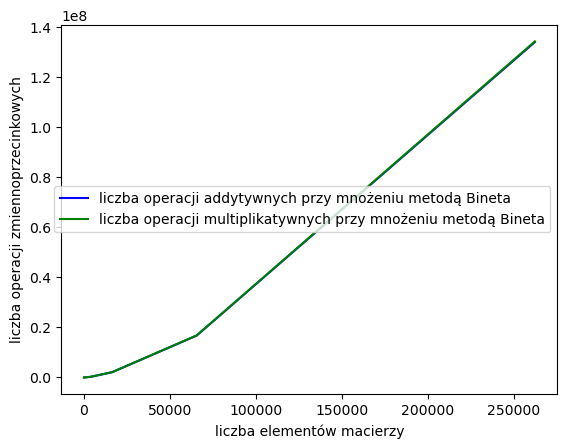

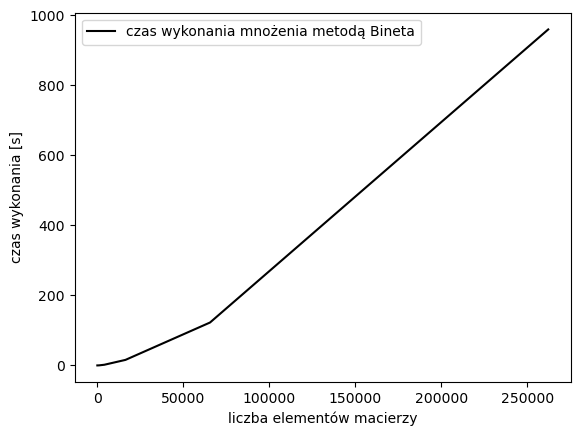

In [31]:
binet_df = add_mat_size(binet_df)
visualise_multiplication(binet_df, "Bineta")

In [29]:
binet_df

,k,rozmiar,operacje addytywne,operacje multiplikatywne,wszystkie operacje zmiennoprzecinkowe,czas wykonania
0,2,16,48,64,112,0.000698
1,3,64,448,512,960,0.005513
2,4,256,3840,4096,7936,0.027605
3,5,1024,31744,32768,64512,0.174079
4,6,4096,258048,262144,520192,1.916531
5,7,16384,2080768,2097152,4177920,15.825467
6,8,65536,16711680,16777216,33488896,122.610792
7,9,262144,133955584,134217728,268173312,960.098551


In [32]:

print(binet_df)

   k  rozmiar  operacje addytywne  operacje multiplikatywne  \
0  2       16                  48                        64   
1  3       64                 448                       512   
2  4      256                3840                      4096   
3  5     1024               31744                     32768   
4  6     4096              258048                    262144   
5  7    16384             2080768                   2097152   
6  8    65536            16711680                  16777216   
7  9   262144           133955584                 134217728   

   wszystkie operacje zmiennoprzecinkowe  czas wykonania  
0                                    112        0.000698  
1                                    960        0.003138  
2                                   7936        0.026383  
3                                  64512        0.185999  
4                                 520192        1.675873  
5                                4177920       12.215352  
6                  

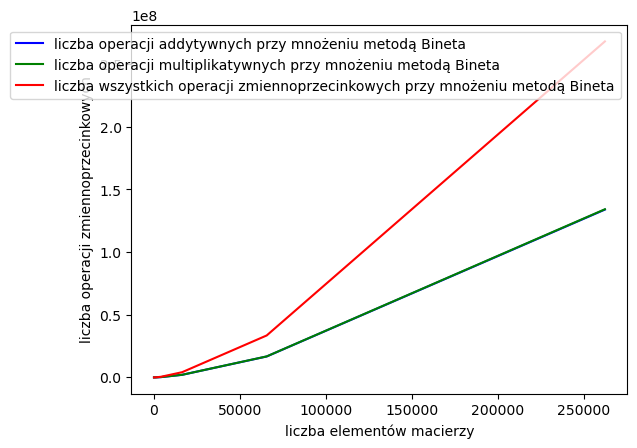

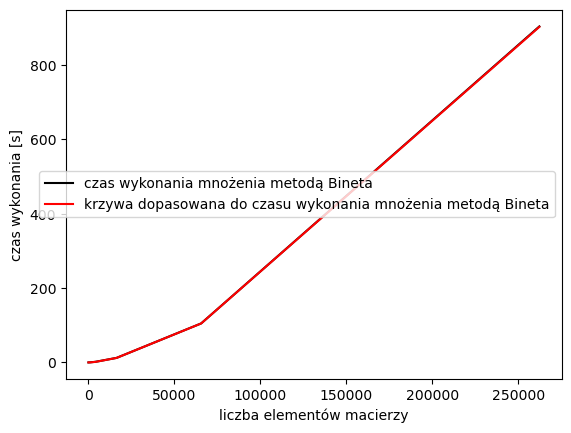

In [62]:

visualise_multiplication(binet_df, "Bineta")

Exponent k is approximately: 2.968674869650815
contant a is approximately: 8.697074461975307e-06


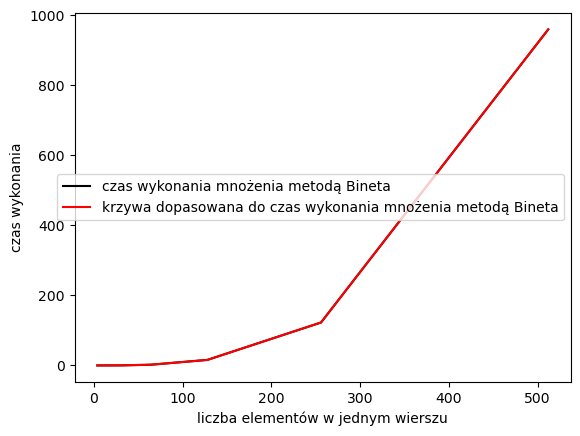

Exponent k is approximately: 3.001456851589486
contant a is approximately: 1.9799707696407636


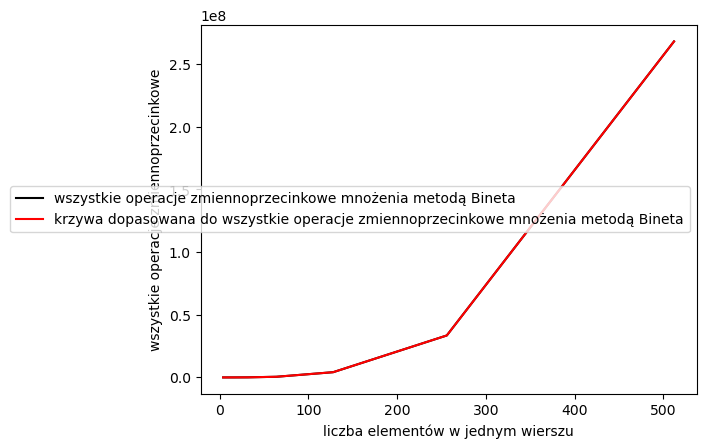

In [36]:
from math import sqrt
def fit_curve(name1, name2, dataframe):
    x_data = [sqrt(i) for i in dataframe[name1]]
    y_data = dataframe[name2]
    def power_law(x, a, k):
        return a*x**k

    params, covariance = curve_fit(power_law, x_data, y_data, p0=[1.0, 1.0])
    a, k = params
    print(f"Exponent k is approximately: {k}")
    print(f"contant a is approximately: {a}")
    return a, k

def plot_with_fit(a, k, data_frame, name1, name2, name):
    powers = [sqrt(i) for i in data_frame[name1]]
    time = data_frame[name2]

    time_spprox = [a * i ** k for i in powers]
    plt.plot(powers, time, label = f"{name2} mnożenia metodą {name}", color="black")
    plt.plot(powers, time_spprox, label = f"krzywa dopasowana do {name2} mnożenia metodą {name}", color="red")
    plt.xlabel("liczba elementów w jednym wierszu")
    plt.ylabel(name2)
    plt.legend()
    # plt.semilogy()
    plt.show()

a, k = fit_curve("rozmiar", "czas wykonania", binet_df)
plot_with_fit(a, k , binet_df, "rozmiar", "czas wykonania", "Bineta")

a, k = fit_curve("rozmiar", "wszystkie operacje zmiennoprzecinkowe", binet_df)
plot_with_fit(a, k , binet_df, "rozmiar", "wszystkie operacje zmiennoprzecinkowe", "Bineta")

In [37]:
strassen_df = measure_multiplication(strassen_mat_mul)
print(strassen_df)
visualise_multiplication(strassen_df, "Strassena")

   k  operacje addytywne  operacje multiplikatywne  \
0  2                 132                        49   
1  3                1116                       343   
2  4                8580                      2401   
3  5               63132                     16807   
4  6              454212                    117649   
5  7             3228636                    823543   
6  8            22797060                   5764801   
7  9           160365852                  40353607   

   wszystkie operacje zmiennoprzecinkowe  czas wykonania  
0                                    181        0.001516  
1                                   1459        0.005362  
2                                  10981        0.034400  
3                                  79939        0.234331  
4                                 571861        1.724280  
5                                4052179       15.954899  
6                               28561861      112.809811  
7                              200719459 

KeyError: 'rozmiar'

   k  rozmiar  operacje addytywne  operacje multiplikatywne  \
0  2       16                 132                        49   
1  3       64                1116                       343   
2  4      256                8580                      2401   
3  5     1024               63132                     16807   
4  6     4096              454212                    117649   
5  7    16384             3228636                    823543   
6  8    65536            22797060                   5764801   
7  9   262144           160365852                  40353607   

   wszystkie operacje zmiennoprzecinkowe  czas wykonania  
0                                    181        0.001516  
1                                   1459        0.005362  
2                                  10981        0.034400  
3                                  79939        0.234331  
4                                 571861        1.724280  
5                                4052179       15.954899  
6                  

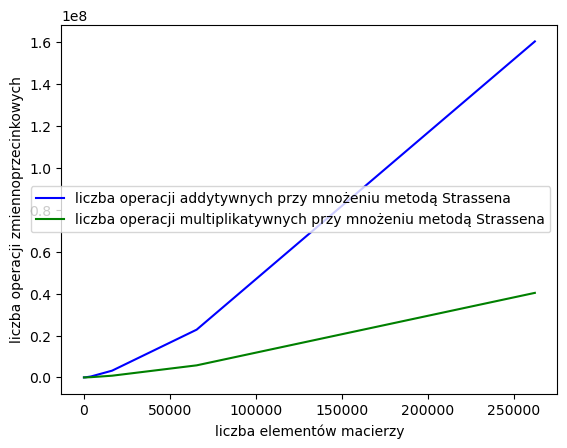

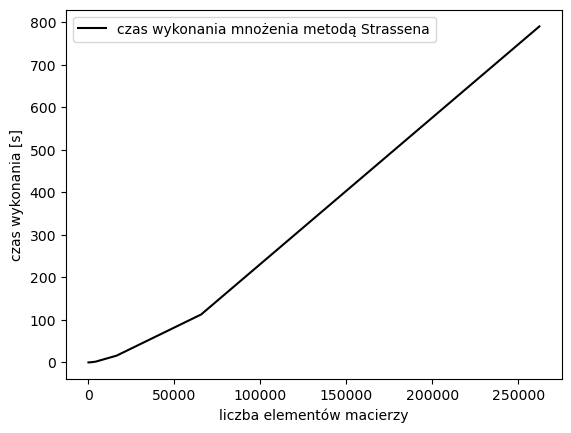

In [38]:
strassen_df = add_mat_size(strassen_df)
print(strassen_df)
visualise_multiplication(strassen_df, "Strassena")

Exponent k is approximately: 2.8096762988769424
contant a is approximately: 1.9306215197332276e-05


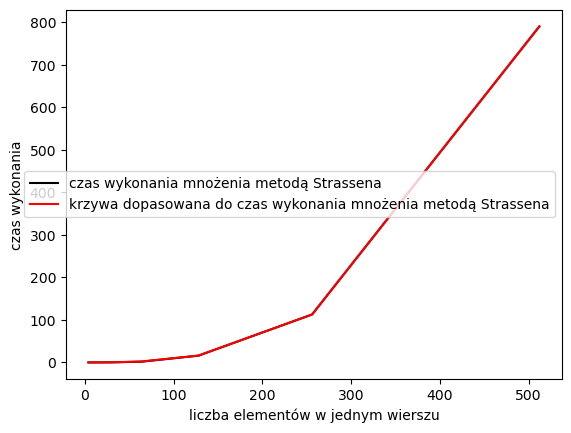

Exponent k is approximately: 2.813200399830365
contant a is approximately: 4.795906528638241


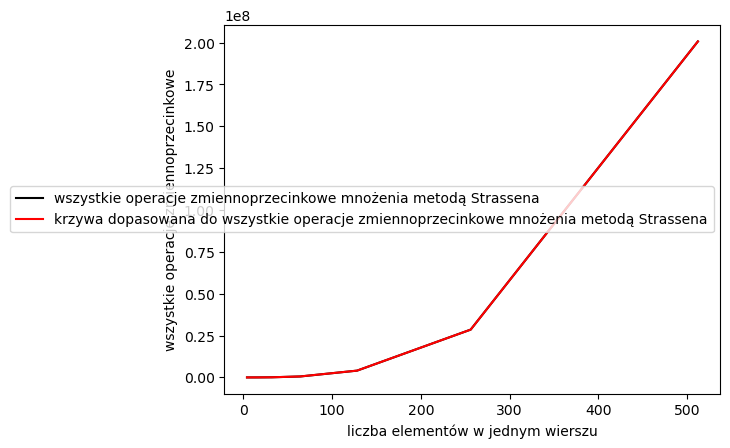

In [39]:
a, k = fit_curve("rozmiar", "czas wykonania", strassen_df)
plot_with_fit(a, k , strassen_df, "rozmiar", "czas wykonania", "Strassena")

a, k = fit_curve("rozmiar", "wszystkie operacje zmiennoprzecinkowe", strassen_df)
plot_with_fit(a, k , strassen_df, "rozmiar", "wszystkie operacje zmiennoprzecinkowe", "Strassena")

    rozmiar A  rozmiar B  suma rozmiarow A i B  iloczyn rozmiarów A i B  \
0          20         25                    45                      500   
1          80         25                   105                     2000   
2         320         25                   345                     8000   
3         100        625                   725                    62500   
5         400        625                  1025                   250000   
4        1280         25                  1305                    32000   
7        1600        625                  2225                  1000000   
6        5120         25                  5145                   128000   
10       6400        625                  7025                  4000000   
8         500      15625                 16125                  7812500   
11       2000      15625                 17625                 31250000   
9       20480         25                 20505                   512000   
13       8000      15625 

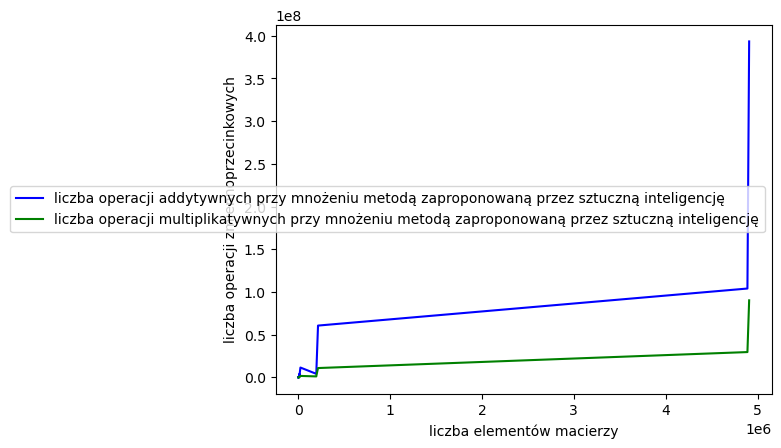

In [47]:
def visualise_multiplication2(data_frame, name):
    print(data_frame)
    powers = [i/2 for i in data_frame["suma rozmiarow A i B"]]
    add_cnt= data_frame["operacje addytywne"]
    mul_cnt = data_frame["operacje multiplikatywne"]
    fl_cnt = data_frame["wszystkie operacje zmiennoprzecinkowe"]
    time = data_frame["czas wykonania"]

    plt.plot(powers, add_cnt, label = f"liczba operacji addytywnych przy mnożeniu metodą {name}", color="blue")
    plt.plot(powers, mul_cnt, label = f"liczba operacji multiplikatywnych przy mnożeniu metodą {name}", color="green")
    # plt.plot(powers, fl_cnt, label = f"liczba wszystkich operacji zmiennoprzecinkowych przy mnożeniu metodą {name}", color="red")
    plt.xlabel("liczba elementów macierzy")
    plt.ylabel("liczba operacji zmiennoprzecinkowych")
    plt.legend()
    # plt.semilogy()
    plt.show()
visualise_multiplication2(ai_df.sort_values(by=["suma rozmiarow A i B"]), "zaproponowaną przez sztuczną inteligencję")

Exponent k is approximately: 1.4382587555010848
contant a is approximately: 0.008093885445105064


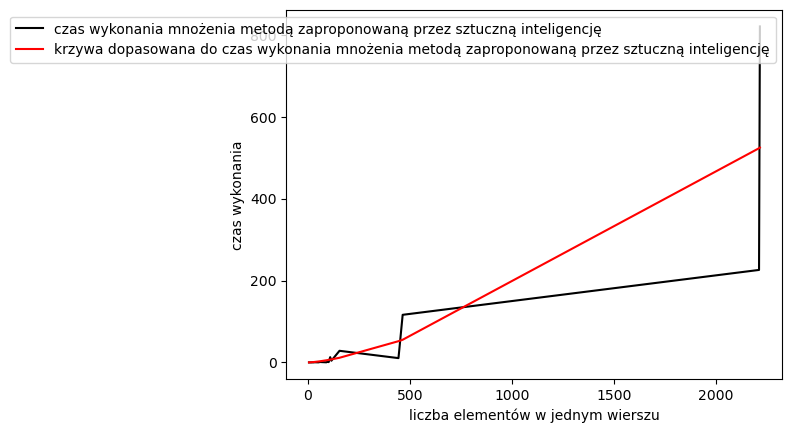

Exponent k is approximately: 1.4283478153154996
contant a is approximately: 5155.597817997327


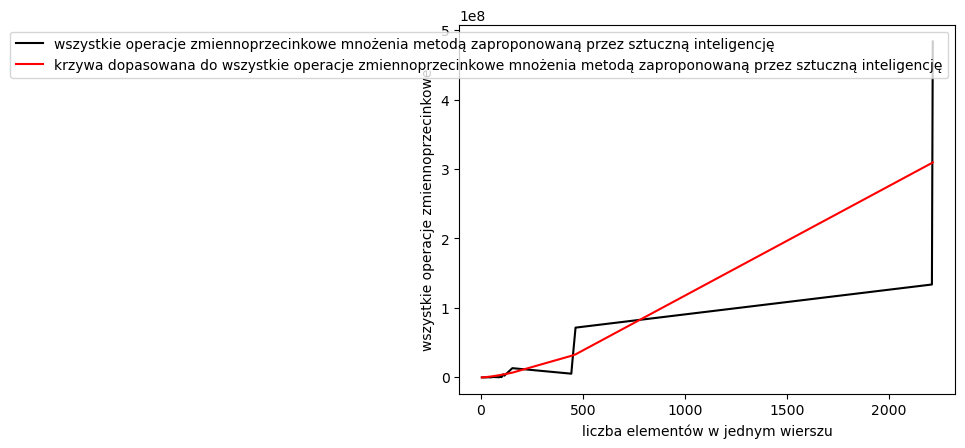

In [55]:
def fit_curve2(name1, name2, dataframe):
    x_data = [sqrt(i/2) for i in dataframe[name1]]
    y_data = dataframe[name2]
    def power_law(x, a, k):
        return a*x**k

    params, covariance = curve_fit(power_law, x_data, y_data, p0=[1.0, 1.0])
    a, k = params
    print(f"Exponent k is approximately: {k}")
    print(f"contant a is approximately: {a}")
    return a, k

def plot_with_fit2(a, k, data_frame, name1, name2, name):
    powers = [sqrt(i/2) for i in data_frame[name1]]
    time = data_frame[name2]

    time_spprox = [a * i ** k for i in powers]
    plt.plot(powers, time, label = f"{name2} mnożenia metodą {name}", color="black")
    plt.plot(powers, time_spprox, label = f"krzywa dopasowana do {name2} mnożenia metodą {name}", color="red")
    plt.xlabel("liczba elementów w jednym wierszu")
    plt.ylabel(name2)
    plt.legend()
    # plt.semilogy()
    plt.show()

ai_df2 = ai_df.drop(19)
ai_df2 = ai_df2.drop(18)
a, k = fit_curve2("suma rozmiarow A i B", "czas wykonania", ai_df.sort_values(by=["suma rozmiarow A i B"]))
plot_with_fit2(a, k , ai_df.sort_values(by=["suma rozmiarow A i B"]), "suma rozmiarow A i B", "czas wykonania", "zaproponowaną przez sztuczną inteligencję")

a, k = fit_curve2("suma rozmiarow A i B", "wszystkie operacje zmiennoprzecinkowe", ai_df.sort_values(by=["suma rozmiarow A i B"]))
plot_with_fit2(a, k , ai_df.sort_values(by=["suma rozmiarow A i B"]), "suma rozmiarow A i B", "wszystkie operacje zmiennoprzecinkowe", "zaproponowaną przez sztuczną inteligencję")

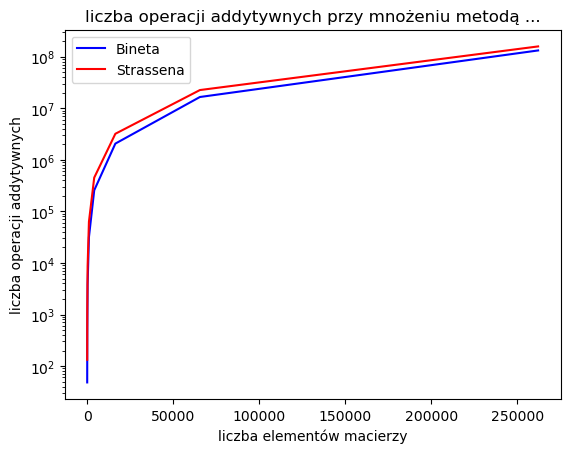

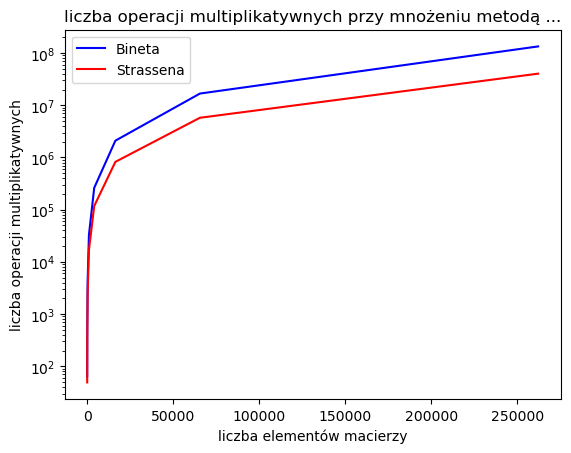

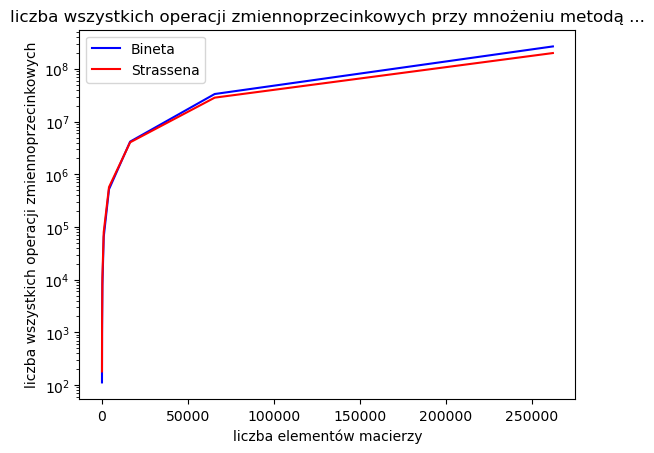

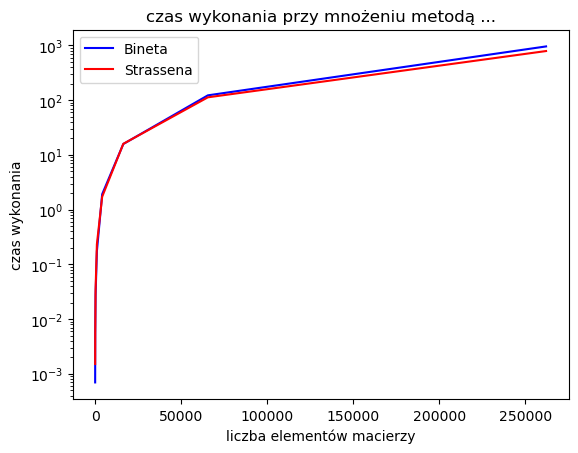

In [59]:
compare_dataframes(binet_df, strassen_df, ai_df)

benchmark

binet

In [60]:
# mat1 = np.array(np.genfromtxt("./big_matrix/matrix_data_0.csv", delimiter=",", dtype=float))
# mat2 = np.array(np.genfromtxt("./big_matrix/matrix_data_3.csv", delimiter=",", dtype=float))
binet_results = []
for _ in range(10):
    mat1 = gen_mat_of_size_2_power_k(9)
    mat2= gen_mat_of_size_2_power_k(9)
    st = timer()
    mat1@mat2
    end = timer()
    binet_results.append(end-st)
    print(end-st)

411.724295299995
411.2238983000134


KeyboardInterrupt: 

In [ ]:
strassen_results = []
for _ in range(10):
    st = timer()
    binet_mat_mul(mat1, mat2)
    end = timer()
    strassen_results.append(end-st)
    print(end-st)